In [81]:
pip install shap

In [82]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import shap

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/Fibovin/des_modelos_1/refs/heads/main/Student_Performance.csv')
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [84]:
#Paso 1
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0}) #Codificamos la variable Extracurricular Activities ya que es categorica

## **Split de los datos**

In [85]:
#Separamos las variables preiotras de la variable objetivo
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]

## **Entrenamiento del modelo - Regresión lineal simple**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Dividimos los datos en un 80-20

#Crreamos y entrenamos el modelo de la regresión lineal simple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Ralizamos las predicciones en el conjunto de entrenamiento y prueba
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

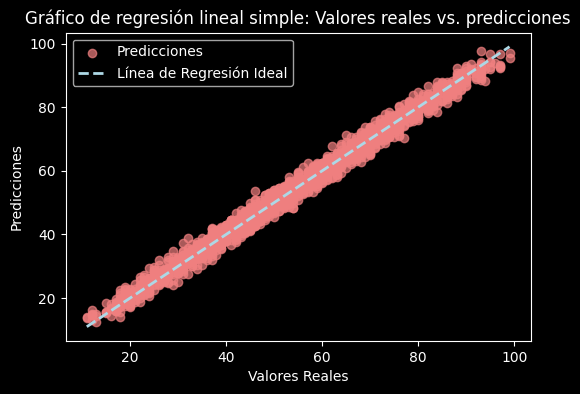

In [87]:
#Graficamos la regresión
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, color="lightcoral", label="Predicciones", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="lightblue", linestyle="--", lw=2, label="Línea de Regresión Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de regresión lineal simple: Valores reales vs. predicciones")
plt.legend()
plt.show()

## **Evaluación del modelo - Regresión lineal simple**

In [88]:
# Calculamos las métricas en el conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculamos las métricas en el conjunto de prueba
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

metrics_summary = [["Entrenamiento", r2_train, mse_train, mae_train],["Prueba", r2_test, mse_test, mae_test]]
print(tabulate(metrics_summary, headers=["Conjunto", "R²", "MSE", "MAE"], tablefmt="fancy_grid", floatfmt="g"))

╒═══════════════╤══════════╤═════════╤═════════╕
│ Conjunto      │       R² │     MSE │     MAE │
╞═══════════════╪══════════╪═════════╪═════════╡
│ Entrenamiento │ 0.98869  │ 4.16974 │ 1.61931 │
├───────────────┼──────────┼─────────┼─────────┤
│ Prueba        │ 0.988983 │ 4.08263 │ 1.61112 │
╘═══════════════╧══════════╧═════════╧═════════╛


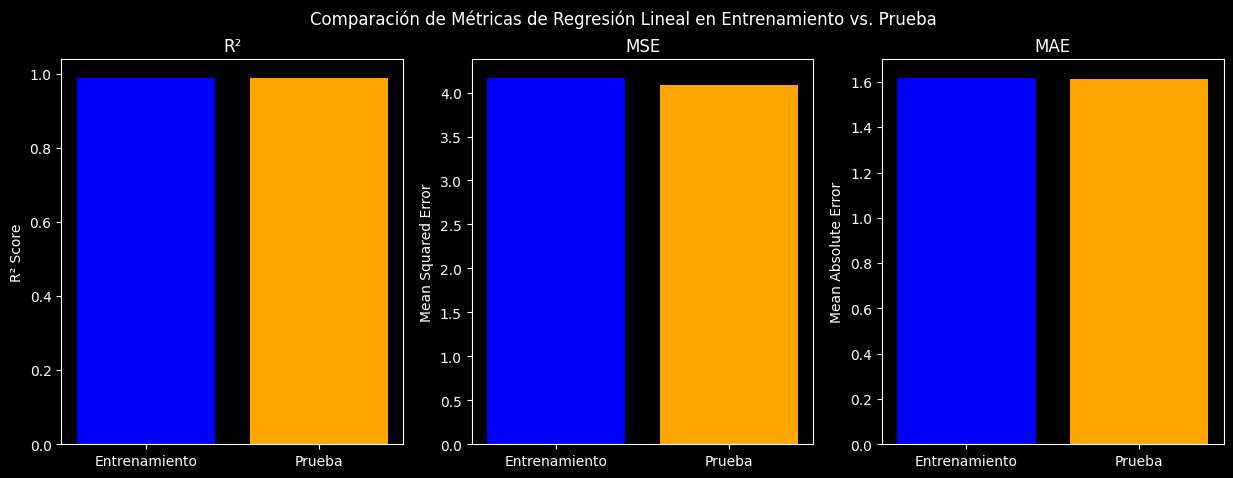

In [89]:
#Graficamos los resultados
metrics_values = {"R²": [r2_train, r2_test],"MSE": [mse_train, mse_test],"MAE": [mae_train, mae_test]}
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(["Entrenamiento", "Prueba"], metrics_values["R²"], color=['blue', 'orange'])
ax[0].set_title("R²")
ax[0].set_ylabel("R² Score")
ax[1].bar(["Entrenamiento", "Prueba"], metrics_values["MSE"], color=['blue', 'orange'])
ax[1].set_title("MSE")
ax[1].set_ylabel("Mean Squared Error")
ax[2].bar(["Entrenamiento", "Prueba"], metrics_values["MAE"], color=['blue', 'orange'])
ax[2].set_title("MAE")
ax[2].set_ylabel("Mean Absolute Error")
plt.suptitle("Comparación de Métricas de Regresión Lineal en Entrenamiento vs. Prueba")
plt.show()

**Análisis**

Los resultados muestran un R² muy alto y similar en ambos conjuntos, con valores cercanos a 0.99, lo que quiere decir que es un buen ajuste en general. Además la media de errores (MAE) y el error cuadrático medio (MSE) también son similares en entrenamiento y prueba, mostrando que el modelo tiene una consistencia en sus errores y no presenta un desbalance importante entre ambos conjuntos.

Estos resultados confirman que no hay sobreajuste, ya que el modelo mantiene un rendimiento estable y alto en entrenamiento y prueba. Por lo tanto el modelo está capturando patrones reales en los datos y no aprendiendo de forma excesiva los detalles específicos del conjunto de entrenamiento.

Así las cosas las metricas muestran que son positivas y muestran que el modelo es confiable y generaliza bien.

## **Análisis de importancia de variables- Regresión lineal simple**

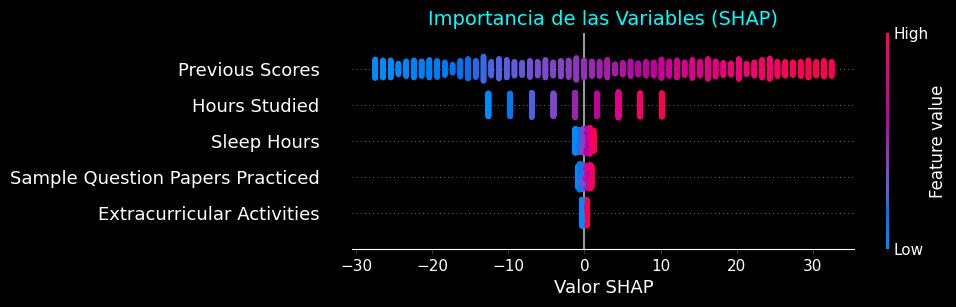

In [90]:
#Creamos el SHPA para nuetsra regresión
explainer = shap.Explainer(linear_model, X_train)
shap_values = explainer(X_test)

plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values, X_test, plot_size=(10, 3), show=False)
plt.title("Importancia de las Variables (SHAP)", color="cyan", fontsize=14)
plt.xlabel("Valor SHAP", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

In [91]:
#Obtenemos los coeficientes de la regresión lineal
coefficients = pd.DataFrame({"Variable": X.columns,"Coeficiente": linear_model.coef_})

#Calculamos la importancia relativa
coefficients["Importancia Relativa"] = coefficients["Coeficiente"].abs()
coefficients = coefficients.sort_values(by="Importancia Relativa", ascending=False)

table = tabulate(coefficients, headers="keys", tablefmt="fancy_grid", showindex=False)
print(table)

╒══════════════════════════════════╤═══════════════╤════════════════════════╕
│ Variable                         │   Coeficiente │   Importancia Relativa │
╞══════════════════════════════════╪═══════════════╪════════════════════════╡
│ Hours Studied                    │      2.85248  │               2.85248  │
├──────────────────────────────────┼───────────────┼────────────────────────┤
│ Previous Scores                  │      1.01699  │               1.01699  │
├──────────────────────────────────┼───────────────┼────────────────────────┤
│ Extracurricular Activities       │      0.608617 │               0.608617 │
├──────────────────────────────────┼───────────────┼────────────────────────┤
│ Sleep Hours                      │      0.476941 │               0.476941 │
├──────────────────────────────────┼───────────────┼────────────────────────┤
│ Sample Question Papers Practiced │      0.191831 │               0.191831 │
╘══════════════════════════════════╧═══════════════╧════════════

**Análisis**: el análisis muestra que la variable con mayor impacto en el Performance Index es Hours Studied, por lo tanto indica que estudiar más horas está directamente relacionado con un mejor puntaje. Previous Scores también influye de manera positiva, aunque en menor medida, indicando que el rendimiento previo es un buen predictor del puntaje actual. Las demás variables (Extracurricular Activities, Sleep Hours, y Sample Question Papers Practiced) tienen un efecto menor. En general, el modelo confirma que el puntaje depende sobre todo de las horas de estudio y el historial de rendimiento.

## **Tunning del modelo - Regresión lineal simple**

#### **Regularizamos la regresión con un Lasso y Ridge**

In [92]:
# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_r2 = ridge_model.score(X_test, y_test)

# Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_r2 = lasso_model.score(X_test, y_test)

ridge_lasso_summary = [["Ridge", ridge_r2],["Lasso", lasso_r2]]
print(tabulate(ridge_lasso_summary, headers=["Modelo", "R²"], tablefmt="fancy_grid", floatfmt="g"))

╒══════════╤══════════╕
│ Modelo   │       R² │
╞══════════╪══════════╡
│ Ridge    │ 0.988983 │
├──────────┼──────────┤
│ Lasso    │ 0.988822 │
╘══════════╧══════════╛


#### **Realizamos un cross-validation a nuestra regresión**

In [93]:
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring="r2")
r2_cv_mean = cv_scores.mean()
cv_summary = [["Regresión Lineal (Validación Cruzada)", r2_cv_mean]]
print(tabulate(cv_summary, headers=["Modelo", "R² Promedio"], tablefmt="fancy_grid", floatfmt="g"))

╒═══════════════════════════════════════╤═══════════════╕
│ Modelo                                │   R² Promedio │
╞═══════════════════════════════════════╪═══════════════╡
│ Regresión Lineal (Validación Cruzada) │      0.988734 │
╘═══════════════════════════════════════╧═══════════════╛


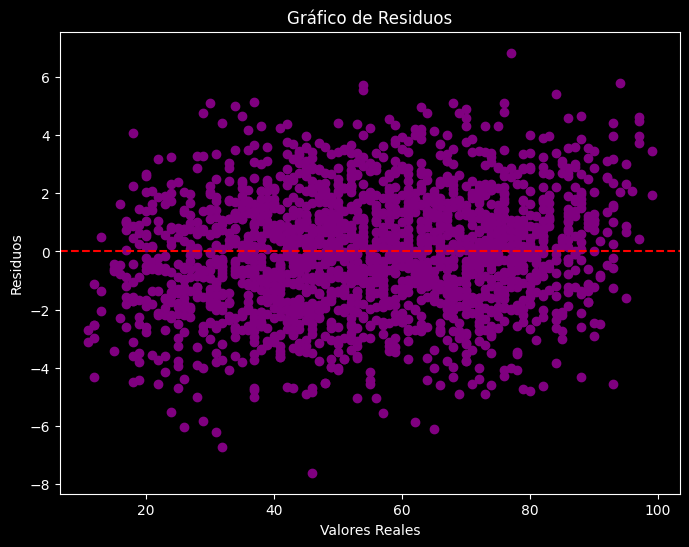

In [94]:
#Calcular los residuos
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Reales")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

## **Comparación de los modelos- Regresión lineal simple**

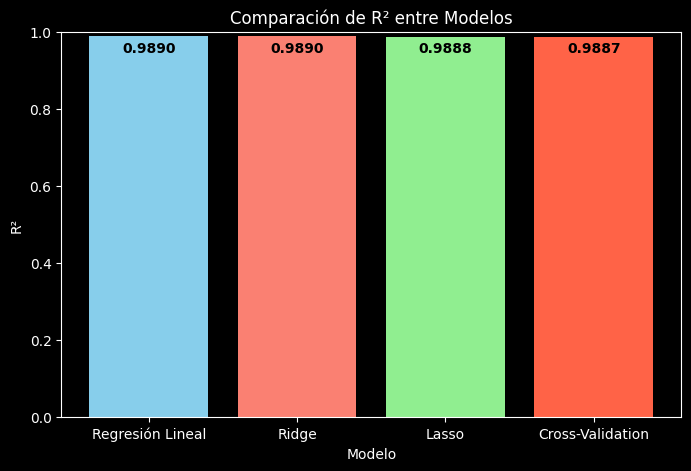

In [95]:
model_names = ["Regresión Lineal", "Ridge", "Lasso", "Cross-Validation"]
r2_values = [r2_test, ridge_r2, lasso_r2, r2_cv_mean]


plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_values, color=["skyblue", "salmon", "lightgreen", "tomato"])
plt.xlabel("Modelo")
plt.ylabel("R²")
plt.title("Comparación de R² entre Modelos")
plt.ylim(0, 1)

for bar, r2_value in zip(bars, r2_values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 0.05,
        f"{r2_value:.4f}",
        ha="center",
        va="bottom",
        color="black",
        fontweight="bold"
    )

plt.show()

**Conclusión**

Todos los modelos tienen un R² muy similar, con valores alrededor de 0.988-0.989, por lo tanto todos están ajustando bien los datos sin signos de sobreajuste. La regularización en Ridge y Lasso no mejoró significativamente el ajuste, esto quiere decir que el modelo lineal original ya es suficientemente bueno. La validación cruzada confirma que el modelo generaliza bien a nuevas particiones de los datos.